# Titanic Dataset EDA

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import plotly.graph_objects as go

In [254]:
my_font =dict(
            family="Courier New, monospace",
            size=18,
            color="Black",
            variant="small-caps",
) 

In [240]:
train = pd.read_csv('data/train.csv')

In [241]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the amount of null values

In [242]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### General description of the dataset

In [243]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data type of each column

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

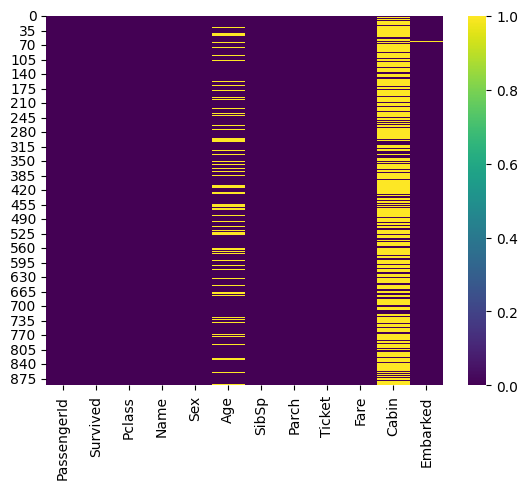

In [245]:
sns.heatmap(data=train.isnull(), cmap="viridis")

### We note there are a lot of cabin missing values. 
- We are going to treat it as known and unknown.
- Age we are simply going to input it with the mean age

In [246]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


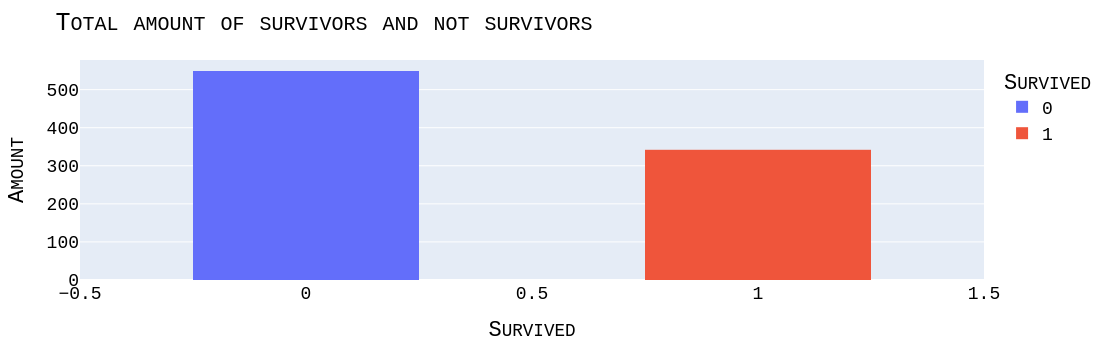

In [262]:
survivors = train.groupby('Survived').size().reset_index(name='Amount')
fig = px.histogram(survivors, x='Survived', y='Amount', color='Survived')
fig.update_layout(
    title = {
        'text': f"Total amount of survivors and not survivors"
    },
    bargap=0.5,
    yaxis_title='Amount',
   font = my_font
)

fig.show()


## Analysing Sex

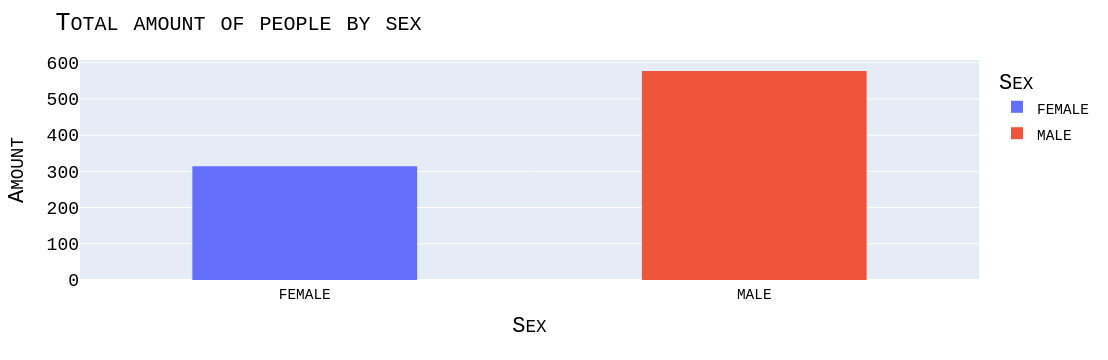

In [263]:
# total amount of people by sex

total_amount_by_sex = train.groupby('Sex').size().reset_index(name='Amount')

fig = px.histogram(total_amount_by_sex, x='Sex', y='Amount', color='Sex')
fig.update_layout(
    title = {
        'text': f"Total amount of people by sex"
    },
    bargap=0.5,
    yaxis_title='Amount',
    font=my_font
)

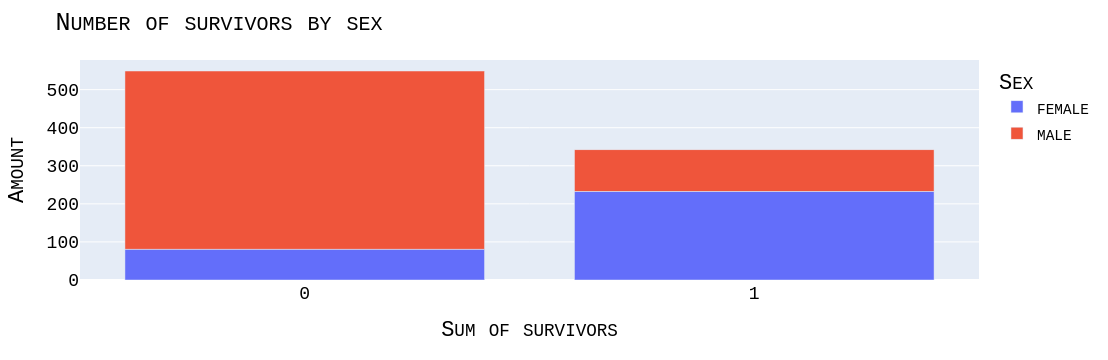

In [264]:
survivors_2 = train.groupby(["Sex", "Survived"]).size().reset_index(name='Amount').sort_values(by="Sex", ascending=True)

fig = px.bar(survivors_2, x='Survived', y='Amount', color='Sex')
fig.update_layout(
    title = {
        'text': f"Number of survivors by sex"
    },
    xaxis_title = "Sum of survivors",
    yaxis_title="Amount",
    font=my_font
)
fig.show()

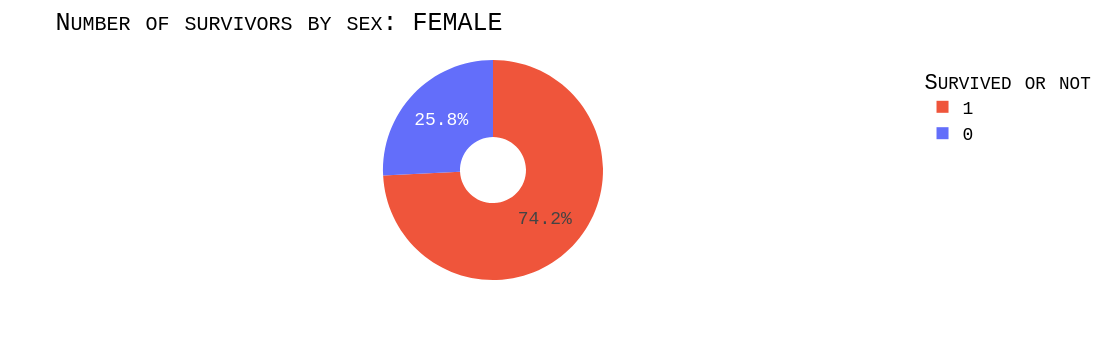

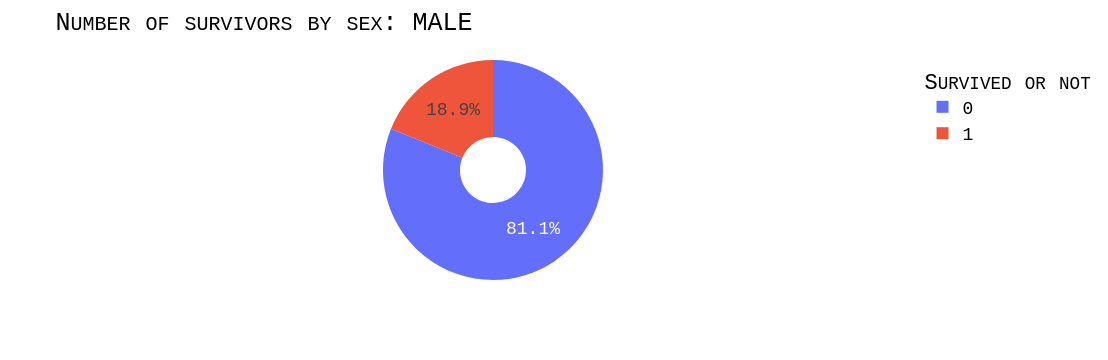

,Sex,Survived,Amount
2,male,0,468
3,male,1,109


In [380]:






sexes = ['female', 'male']

for i in sexes:

    survivors_3 = survivors_2[survivors_2['Sex'] == i]
    
    fig = px.pie(survivors_3, names='Survived', values='Amount', color='Survived', hole = .3)
    fig.update_layout(
        title = {
            'text': f"Number of survivors by sex: {i.upper()}"
        },
        xaxis_title = "Sum of survivors",
        yaxis_title="Amount",
        font=my_font,
        legend_title_text='Survived or not'

    )
    fig.show()

survivors_3

## Analysing classes

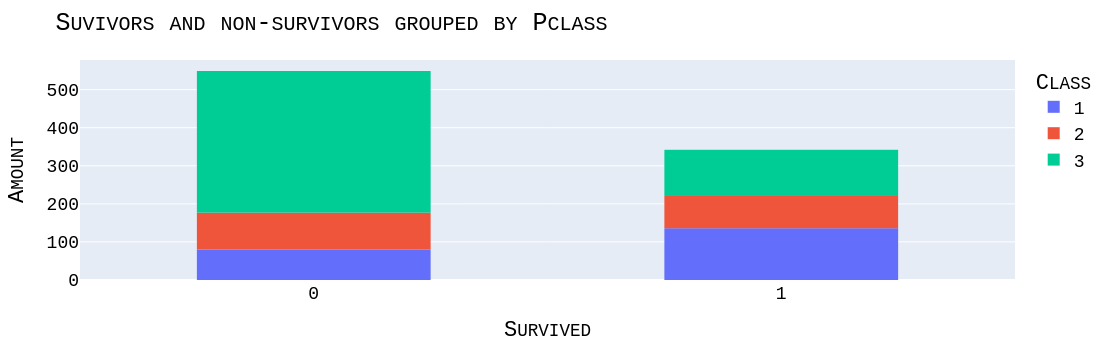

In [256]:
survivors_by_class = train.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Amount')
fig = px.histogram(
    survivors_by_class,
    x='Survived',
    y='Amount',
    color='Pclass'
)

fig.update_layout(bargap=0.5,
                 title= {
                     'text': f"Suvivors and non-survivors grouped by Pclass"
                 },
                  yaxis_title='Amount',
                  legend_title_text='Class',
                  font=my_font
                 
)

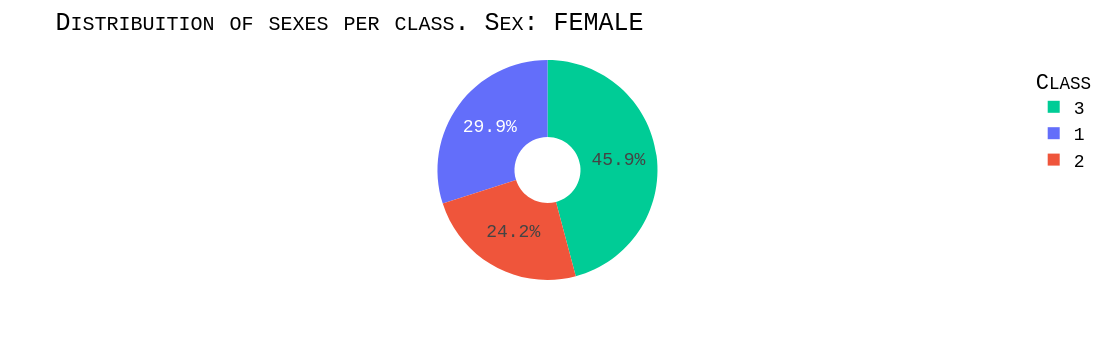

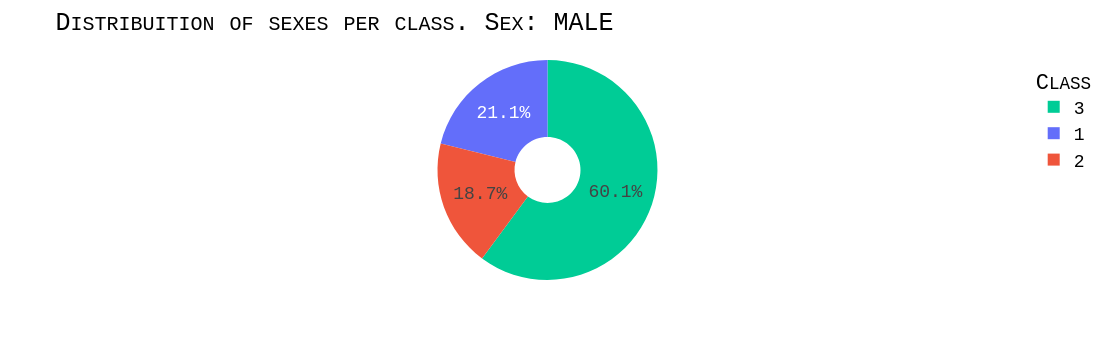

In [308]:
# survivors_by_class = train.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Amount')

# Group per class to see the amount of males and females by each class

survivors_by_class_2 = survivors_by_class.drop(columns='Survived')

for i in sexes:
    survivors_by_class_3 = survivors_by_class_2[survivors_by_class_2['Sex'] == i]
    fig = px.pie(
        survivors_by_class_3,
        names='Pclass',
        values='Amount',
        color='Pclass',
        hole = .3,
    )
    fig.update_layout(
        title = {
            'text': f'Distribuition of sexes per class. Sex: {i.upper()}'
        },
        legend_title_text='Class',
        font=my_font
    )
    fig.show()


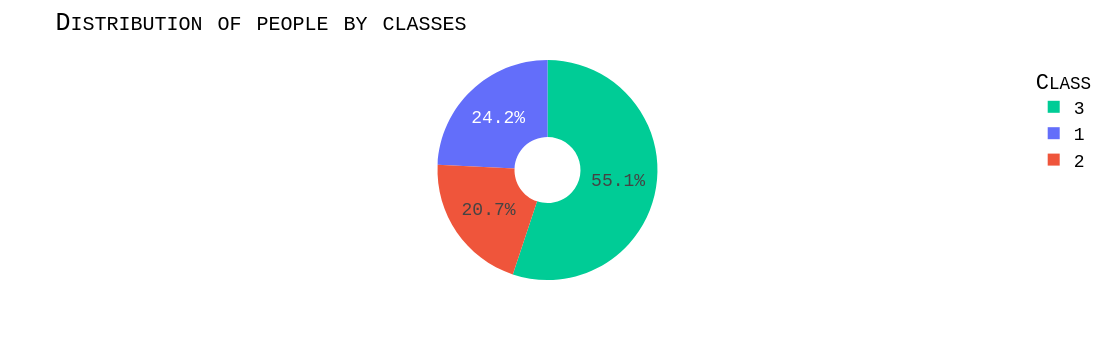

In [309]:

x = survivors_by_class_2.groupby('Pclass').sum('Amount').reset_index()

fig = px.pie(x, names = 'Pclass', values='Amount', color='Pclass', hole = .3,)
fig.update_layout(title={"text": 'Distribution of people by classes'}, font=my_font, legend_title_text='Class')
fig.show()



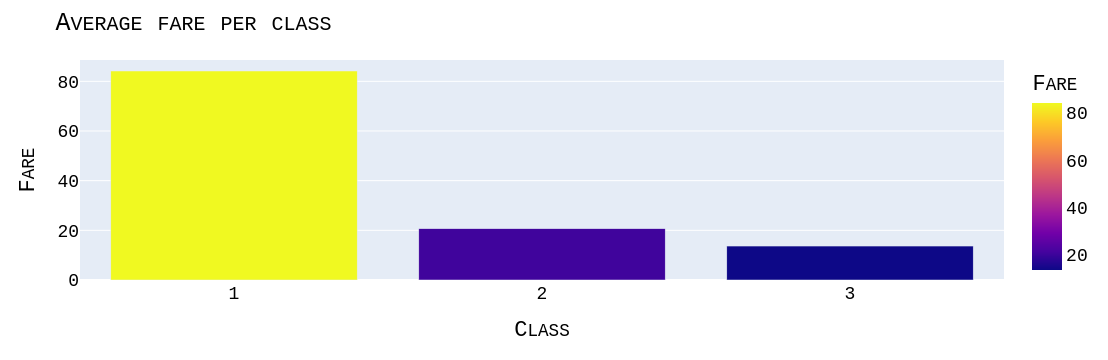

In [403]:
fare_per_class = train.groupby('Pclass').mean('Fare').reset_index()

fig = px.bar(fare_per_class, x='Pclass', y='Fare',color='Fare')
fig.update_layout(title = {'text': 'Average fare per class'}, font = my_font, legend_title_text='Class', xaxis_title='Class')
fig.update_xaxes(type='category')
fig.show()


## Analysing Age

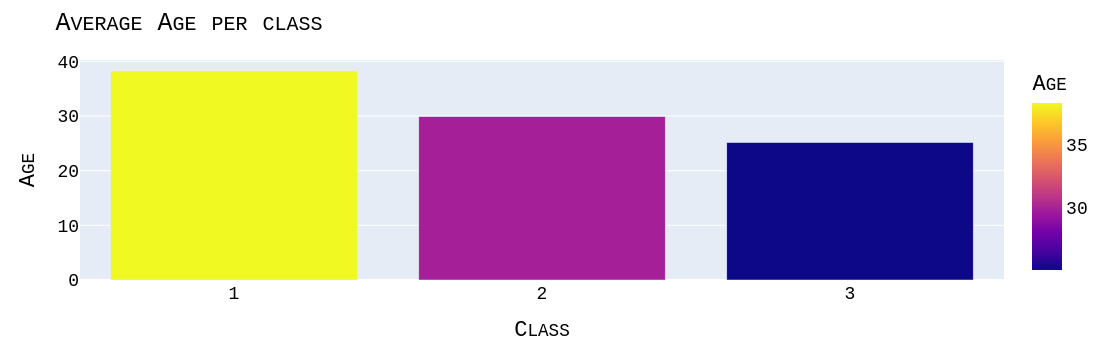

In [412]:
age_per_class = train.groupby('Pclass').mean('Age').reset_index()

fig = px.bar(age_per_class, x='Pclass', y='Age',color='Age')
fig.update_layout(title = {'text': 'Average Age per class'}, font = my_font, legend_title_text='Class', xaxis_title='Class')
fig.update_xaxes(type='category')
fig.show()

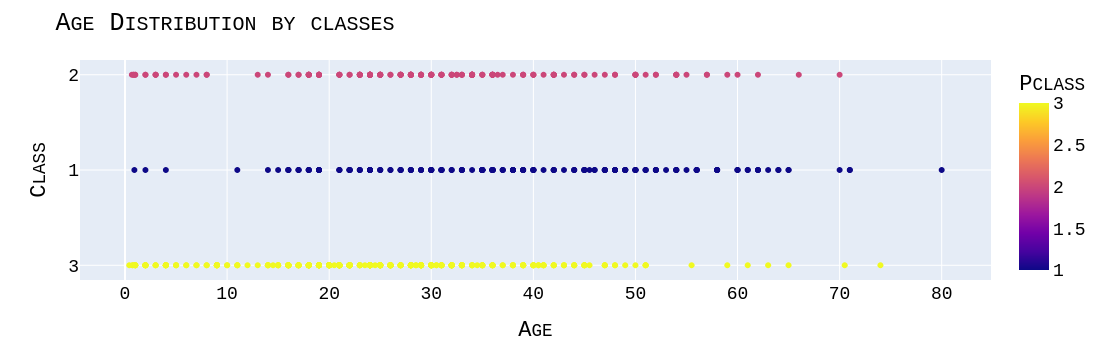

In [450]:
fig = px.scatter(train, x = 'Age', y = 'Pclass', color = 'Pclass')
fig.update_layout(legend_title_text='Class', font = my_font, title={"text": "Age Distribution by classes"}, yaxis_title = 'Class')
fig.update_yaxes(type = 'category')
fig.show()

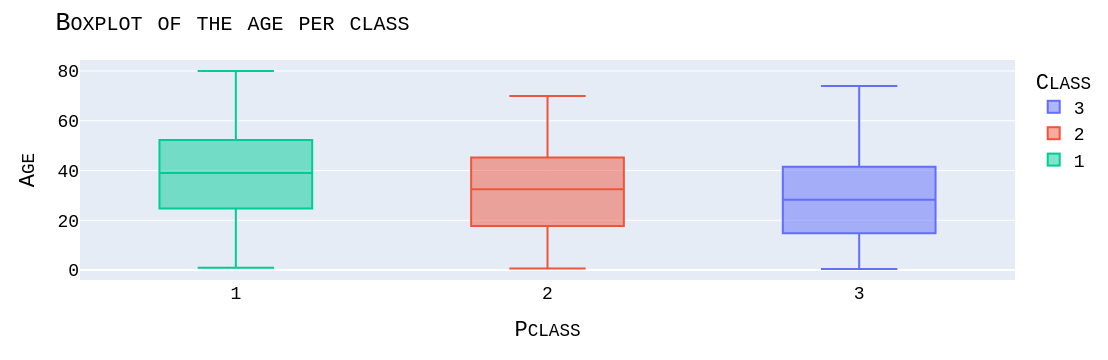

In [461]:
fig = px.box(age_distribution, y = 'Age', x = 'Pclass', color='Pclass')
fig.update_layout(legend_title_text = 'Class', title = { "text": "Boxplot of the age per class" }, font= my_font)
fig.show()

## Analysing Age of females and males per classes